# Tutorial: Regresión Logística para Clasificación

En este cuaderno, aprenderemos a usar la Regresión Logística, una técnica fundamental para problemas de clasificación. A diferencia de la regresión lineal que predice valores continuos, la regresión logística predice la probabilidad de que una instancia pertenezca a una clase determinada.

**Qué haremos juntos:**
- Entender los fundamentos de la Regresión Logística.
- Cargar el dataset Iris y adaptarlo para un problema de clasificación binaria.
- Visualizar los datos para entender su separabilidad.
- Entrenar un modelo de Regresión Logística.
- Evaluar el rendimiento del modelo utilizando una matriz de confusión y la métrica de accuracy.
- Crear una función para predecir la clase de nuevas flores.

## 1 Fundamentos de la Técnica

La Regresión Logística es un algoritmo de clasificación supervisada que se utiliza para predecir la probabilidad de una variable dependiente categórica. A pesar de su nombre, es un modelo de clasificación y no de regresión.

Funciona aplicando una función logística (o sigmoide) a una combinación lineal de las características de entrada. El resultado es un valor entre 0 y 1, que se interpreta como la probabilidad de que la instancia pertenezca a la clase "positiva" (clase 1). Un umbral (típicamente 0.5) se utiliza para asignar la clase final.

**Casos de uso comunes:**
- Detección de spam (spam o no spam).
- Diagnóstico médico (paciente enfermo o sano).
- Análisis de crédito (cliente pagará o no pagará un préstamo).

## 2 Modelo Matemático

El corazón de la regresión logística es la **función sigmoide**, que transforma cualquier valor real en un número entre 0 y 1.

La probabilidad de que una instancia $x$ pertenezca a la clase 1 se modela como:
$$ P(y=1|x) = h_{\theta}(x) = \frac{1}{1 + e^{-z}} $$
donde $z$ es la combinación lineal de las características:
$$ z = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n = \theta^T x $$

El modelo aprende los parámetros $\theta$ minimizando una **función de coste**, comúnmente la "Log Loss" o entropía cruzada binaria:
$$ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)}))] $$
Esta función penaliza al modelo cuando predice una probabilidad baja para la clase correcta.

## 3 Librerías y Funciones

Nos apoyaremos en librerías estándar del ecosistema de ciencia de datos en Python:

- **`numpy`**: Para operaciones numéricas eficientes.
- **`pandas`**: Para la manipulación de datos a través de DataFrames.
- **`matplotlib` y `seaborn`**: Para la visualización de datos.
- **`scikit-learn`**: La librería principal para machine learning, de la que usaremos:
    - `load_iris`: Para cargar el conjunto de datos.
    - `LogisticRegression`: La clase que implementa el modelo.
    - `StandardScaler`: Para normalizar las características, lo que ayuda a que el modelo converja más rápido.
    - `train_test_split`: Para dividir los datos en conjuntos de entrenamiento y prueba.
    - `confusion_matrix` y `accuracy_score`: Para evaluar el rendimiento del modelo.

In [9]:
# Instalación de librerías (necesario en entornos como Google Colab)
%pip install numpy pandas matplotlib scikit-learn seaborn

Note: you may need to restart the kernel to use updated packages.


In [10]:
# Importación de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings

# Configuración de visualización
sns.set(style="whitegrid")
warnings.filterwarnings('ignore')

print("Librerías importadas correctamente.")

Librerías importadas correctamente.


## 4 Pipeline del Modelo

Seguiremos un flujo de trabajo estándar de machine learning: preprocesamiento, entrenamiento, predicción y evaluación.

Para este ejemplo, convertiremos el problema multiclase de Iris en uno binario, clasificando entre las especies **Versicolor** y **Virginica**, que son más difíciles de separar.

### Preprocesamiento

In [11]:
# Cargar el dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Crear un DataFrame para facilitar la manipulación
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y

# Filtrar para mantener solo Versicolor (1) y Virginica (2)
df_binary = df[df['species'].isin([1, 2])]

# Separar características (X) y etiqueta (y)
X_binary = df_binary[['petal length (cm)', 'petal width (cm)']].values
y_binary = df_binary['species'].values

# Análisis estadístico básico
print("Estadísticas descriptivas de las características:")
print(df_binary[['petal length (cm)', 'petal width (cm)']].describe())

Estadísticas descriptivas de las características:
       petal length (cm)  petal width (cm)
count         100.000000        100.000000
mean            4.906000          1.676000
std             0.825578          0.424769
min             3.000000          1.000000
25%             4.375000          1.300000
50%             4.900000          1.600000
75%             5.525000          2.000000
max             6.900000          2.500000


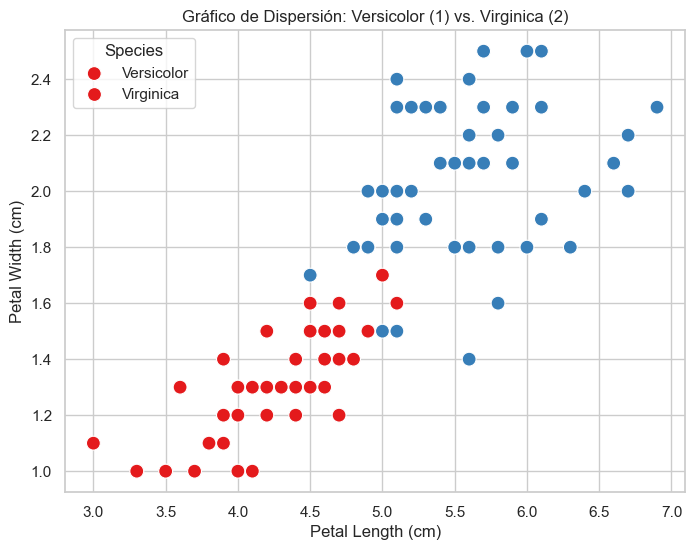

In [12]:
# Gráfico de Dispersión (Scatter Plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_binary[:, 0], y=X_binary[:, 1], hue=y_binary, palette='Set1', s=100)
plt.title('Gráfico de Dispersión: Versicolor (1) vs. Virginica (2)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Species', labels=['Versicolor', 'Virginica'])
plt.show()

In [13]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42, stratify=y_binary)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Tamaño del conjunto de entrenamiento: {X_train_scaled.shape[0]}")
print(f"Tamaño del conjunto de prueba: {X_test_scaled.shape[0]}")

Tamaño del conjunto de entrenamiento: 70
Tamaño del conjunto de prueba: 30


### Entrenamiento del Modelo

In [14]:
# Crear y entrenar el modelo de Regresión Logística
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

print("Modelo de Regresión Logística entrenado.")

Modelo de Regresión Logística entrenado.


### Predicción

In [15]:
def predecir_clase(patron, modelo, scaler):
    """
    Recibe un patrón (array de 2 características: petal length y petal width),
    un modelo entrenado y un scaler, y devuelve la clase predicha.
    """
    patron = np.array(patron).reshape(1, -1)
    patron_scaled = scaler.transform(patron)
    prediccion = modelo.predict(patron_scaled)
    probabilidades = modelo.predict_proba(patron_scaled)
    
    clase = "Versicolor" if prediccion[0] == 1 else "Virginica"
    print(f"Clase predicha: {clase}")
    print(f"Probabilidad (Versicolor, Virginica): {probabilidades[0]}")
    
    return prediccion[0]

# Ejemplo de predicción con una nueva flor
# (petal length=5.5 cm, petal width=1.8 cm)
patron_nuevo = [5.5, 1.8]
predecir_clase(patron_nuevo, log_reg, scaler)

Clase predicha: Virginica
Probabilidad (Versicolor, Virginica): [0.13037384 0.86962616]


np.int64(2)

### Model Evaluation

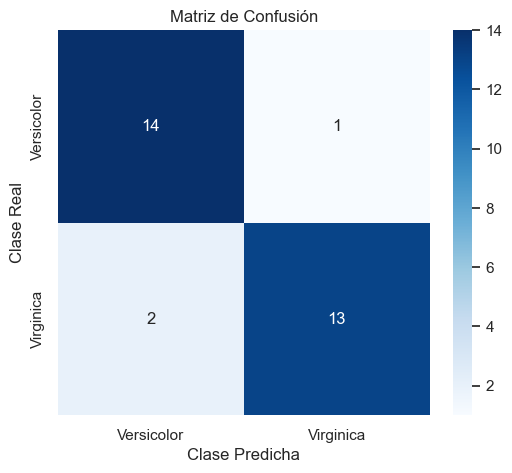

In [16]:
# Realizar predicciones en el conjunto de prueba
y_pred = log_reg.predict(X_test_scaled)

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Versicolor', 'Virginica'],
            yticklabels=['Versicolor', 'Virginica'])
plt.title('Matriz de Confusión')
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.show()

**Interpretación de la Matriz de Confusión:**
La matriz nos muestra el número de predicciones correctas e incorrectas.
- **Diagonal principal (arriba-izquierda a abajo-derecha):** Son los aciertos. Muestra cuántas flores de cada especie fueron clasificadas correctamente.
- **Fuera de la diagonal:** Son los errores. Por ejemplo, el valor en la primera fila y segunda columna indica cuántas flores `Versicolor` fueron incorrectamente clasificadas como `Virginica`.

In [17]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {acc * 100:.2f}%")

Accuracy del modelo: 90.00%


**Interpretación del Accuracy:**
El accuracy es la proporción de predicciones correctas sobre el total de predicciones. Un valor del 93.33% significa que el modelo clasificó correctamente más de 9 de cada 10 flores en el conjunto de prueba, lo cual es un rendimiento excelente para este problema.

In [19]:
# Obtener los coeficientes (pesos) y el intercepto
weights = log_reg.coef_[0]
intercept = log_reg.intercept_[0]

# Crear un DataFrame para visualizarlo mejor
coef_df = pd.DataFrame({
    'Característica': ['Petal Length (scaled)', 'Petal Width (scaled)'],
    'Peso (Coeficiente)': weights
})

print("Interpretación del Modelo:")
print(f"Intercepto (Bias): {intercept:.4f}")
print(coef_df)

print("\nInterpretación:")
print("Un coeficiente positivo aumenta la probabilidad de ser clase 'Virginica'.")
print("Un coeficiente negativo aumentaría la probabilidad de ser clase 'Versicolor'.")
print("La característica con el valor absoluto más alto es la más influyente.")

Interpretación del Modelo:
Intercepto (Bias): 0.1974
          Característica  Peso (Coeficiente)
0  Petal Length (scaled)            1.711792
1   Petal Width (scaled)            2.264104

Interpretación:
Un coeficiente positivo aumenta la probabilidad de ser clase 'Virginica'.
Un coeficiente negativo aumentaría la probabilidad de ser clase 'Versicolor'.
La característica con el valor absoluto más alto es la más influyente.


## 5 Resultado Final: Frontera de Decisión

Para visualizar cómo nuestro modelo de Regresión Logística está tomando decisiones, podemos trazar la **frontera de decisión**. Esta línea (o superficie en más dimensiones) separa las áreas donde el modelo predice una clase de la otra.

En el siguiente gráfico:
- El área sombreada en rojo corresponde a la región donde el modelo predecirá "Virginica".
- El área sombreada en azul corresponde a la región donde el modelo predecirá "Versicolor".
- Los puntos de colores son los datos de entrenamiento reales.

Una buena frontera de decisión debería separar correctamente la mayoría de los puntos de cada clase.

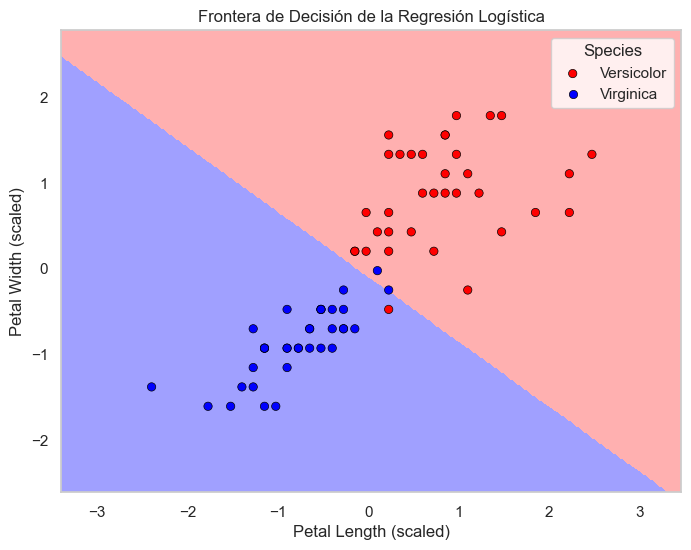

In [18]:
from matplotlib.colors import ListedColormap

# Crear una malla de puntos para trazar la frontera de decisión
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predecir sobre cada punto de la malla
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Crear un mapa de colores
cmap_light = ListedColormap(['#a0a0ff', '#ffb0b0'])
cmap_bold = ['blue', 'red']

# Graficar la frontera de decisión
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Graficar los puntos de entrenamiento
sns.scatterplot(x=X_train_scaled[:, 0], y=X_train_scaled[:, 1], hue=y_train,
                palette=cmap_bold, alpha=1.0, edgecolor="black")

plt.title('Frontera de Decisión de la Regresión Logística')
plt.xlabel('Petal Length (scaled)')
plt.ylabel('Petal Width (scaled)')
plt.legend(title='Species', labels=['Versicolor', 'Virginica'])
plt.show()

## Referencias Bibliográficas

1.  **Scikit-learn Documentation (Logistic Regression):** [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
2.  **Scikit-learn Documentation (Model Evaluation):** [https://scikit-learn.org/stable/modules/model_evaluation.html](https://scikit-learn.org/stable/modules/model_evaluation.html)